In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 16})

In [116]:
data = pd.DataFrame({
    "x": np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
    "y": np.array([1, 1.2, 1.4, 1.1, 1.0, 5.5, 6.1, 6.7, 6.4, 6, 5.9, 3, 3.2, 3.1])
})

data.head()

,x,y
0,1,1.0
1,2,1.2
2,3,1.4
3,4,1.1
4,5,1.0


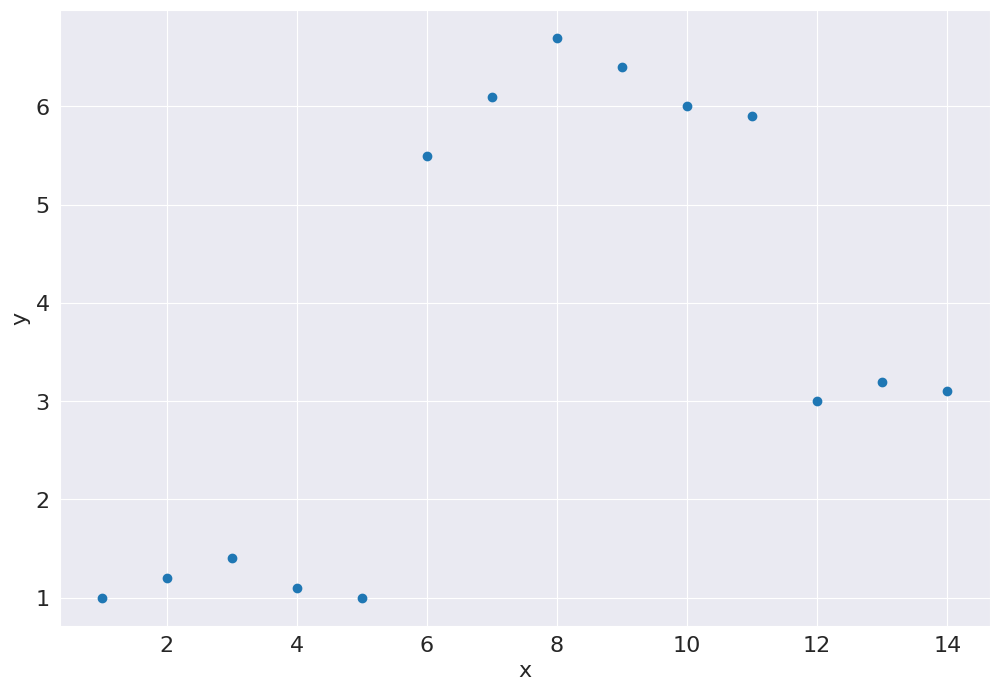

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.scatter(data['x'], data['y'])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [123]:
def draw_distribution(data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

    for d in data['scatter']:
        ax.scatter(**d)

    for d in data['axvline']:
        ax.axvline(**d)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.legend()
    plt.show()


def draw_rsme_plot(data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

    for d in data['plot']:
        ax.plot(d['x'], d['y'], d['line_style'], label=d['label'])

    for d in data['axvline']:
        ax.axvline(d['x'], c=d['c'])

    ax.set_xlabel('threshold')
    ax.set_ylabel('rmse')
    ax.legend()

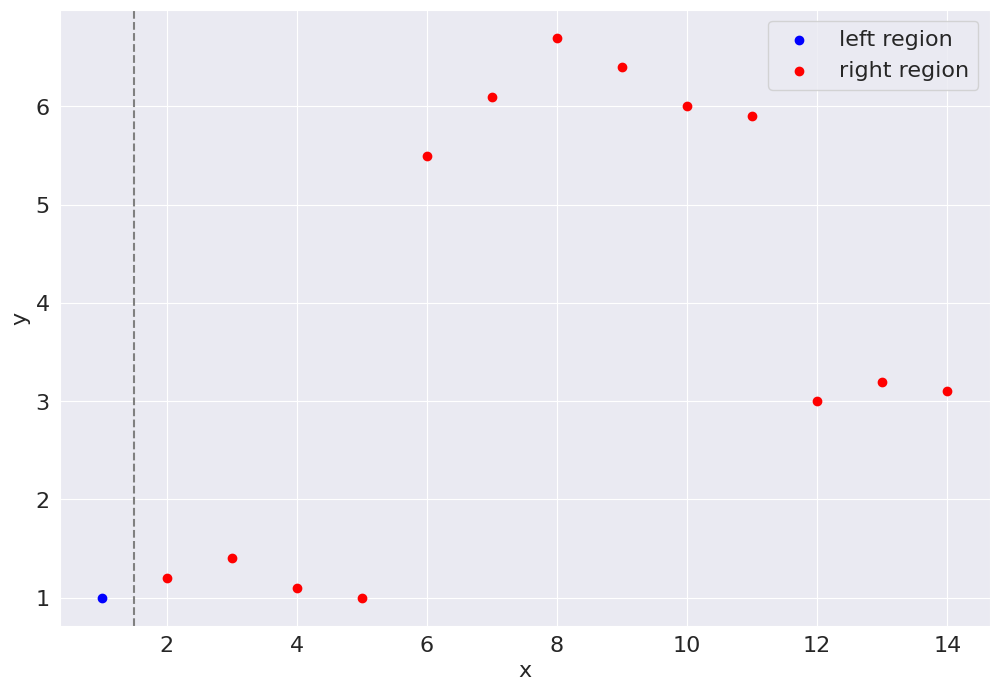

In [119]:
threshold = 1.5

data_left = data[data["x"] < threshold]
data_right = data[data["x"] >= threshold]


param_data = {
    'scatter': [
        {'x': data_left['x'], 'y': data_left['y'], 'c': 'b', 'label': 'left region'},
        {'x': data_right['x'], 'y': data_right['y'], 'c': 'r', 'label': 'right region'},
    ],
    'axvline': [
        {'x': threshold, 'c': 'gray', 'linestyle': '--'}
    ]
}

draw_distribution(param_data)

In [120]:
def split_a_region(data, threshold):
    data_left = data[data["x"] < threshold]
    data_right = data[data["x"] >= threshold]
    return data_left, data_right


def calculate_prediction(data):
    target = data['y']
    prediction = np.mean(target)
    return prediction


def calculate_rmse(y_test, y_pred):
    squared_error = (y_test - y_pred) ** 2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse


def calculate_accuracy(data, threshold):
    data_left, data_right = split_a_region(data, threshold)

    if len(data_left) == 0:
        raise Exception("No data on left region.")

    if len(data_right) == 0:
        raise Exception("No data on right region.")

    pred_left = calculate_prediction(data=data_left)
    pred_right = calculate_prediction(data=data_right)

    rmse_left = calculate_rmse(data_left['y'], pred_left)
    rmse_right = calculate_rmse(data_right['y'], pred_right)
    rmse_total = rmse_left + rmse_right

    print(f"left -> prediction: {pred_left:.4f}, rmse -> prediction: {rmse_left:.4f}")
    print(f"right -> prediction: {pred_right:.4f}, rmse -> prediction: {rmse_right:.4f}")
    print(f"Total RMSE: {rmse_total:.4f}")
    return rmse_left, rmse_right, rmse_total


def create_a_tree(data):
    threshold = data['x']
    rmse_list = []
    threshold_list = []

    for thresh in threshold:
        try:
            rmse = calculate_accuracy(data, thresh)
            rmse_list.append(rmse)
            threshold_list.append(thresh)
        except Exception as e:
            print(e)

    return threshold_list, rmse_list

In [121]:
calculate_accuracy(data, 5.5)

left -> prediction: 1.1400, rmse -> prediction: 0.1497
right -> prediction: 5.1000, rmse -> prediction: 1.4484
Total RMSE: 1.5980


(np.float64(0.1496662954709576),
 np.float64(1.4483707321600288),
 np.float64(1.5980370276309863))

In [129]:
# Calculate RSME
threshold_list, rmse_list = create_a_tree(data)

# Output
threshold_list = np.array(threshold_list)
rmse_list = np.array(rmse_list)

# Extract
rmse_left = rmse_list[:, 0]
rmse_right = rmse_list[:, 1]
rmse_total = rmse_list[:, 2]
best_threshold = threshold_list[np.argmin(rmse_total)]

No data on left region.
left -> prediction: 1.0000, rmse -> prediction: 0.0000
right -> prediction: 3.8923, rmse -> prediction: 2.1773
Total RMSE: 2.1773
left -> prediction: 1.1000, rmse -> prediction: 0.1000
right -> prediction: 4.1167, rmse -> prediction: 2.1169
Total RMSE: 2.2169
left -> prediction: 1.2000, rmse -> prediction: 0.1633
right -> prediction: 4.3636, rmse -> prediction: 2.0388
Total RMSE: 2.2021
left -> prediction: 1.1750, rmse -> prediction: 0.1479
right -> prediction: 4.6900, rmse -> prediction: 1.8442
Total RMSE: 1.9921
left -> prediction: 1.1400, rmse -> prediction: 0.1497
right -> prediction: 5.1000, rmse -> prediction: 1.4484
Total RMSE: 1.5980
left -> prediction: 1.8667, rmse -> prediction: 1.6306
right -> prediction: 5.0500, rmse -> prediction: 1.5289
Total RMSE: 3.1595
left -> prediction: 2.4714, rmse -> prediction: 2.1151
right -> prediction: 4.9000, rmse -> prediction: 1.5784
Total RMSE: 3.6935
left -> prediction: 3.0000, rmse -> prediction: 2.4228
right -> pr

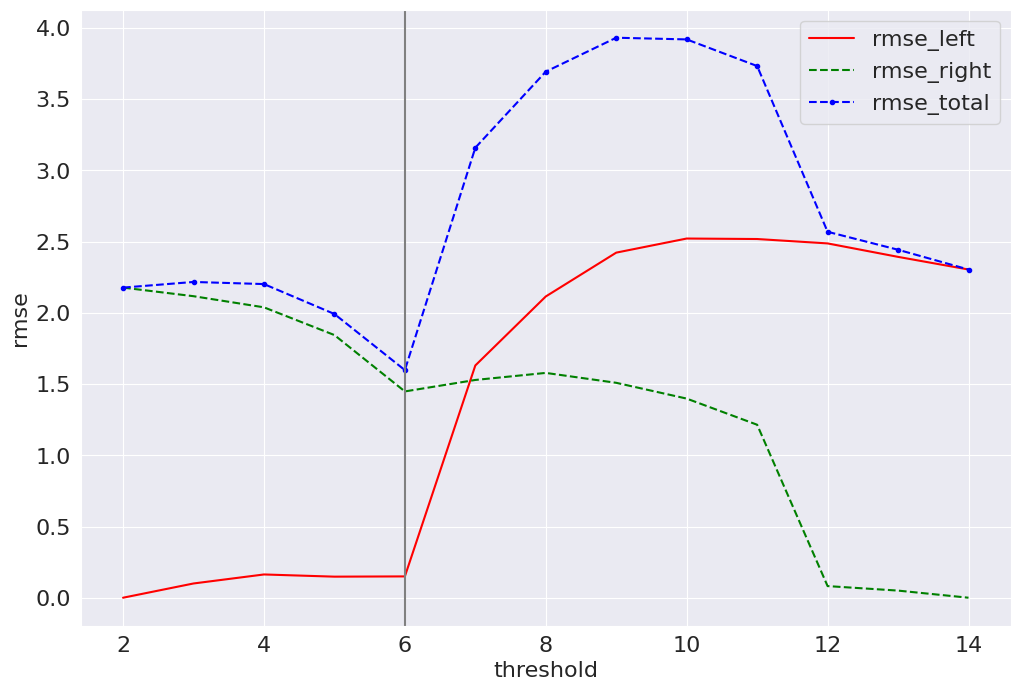

In [130]:
rsme_plot_data = {
    'plot': [
        {'x': threshold_list, 'y': rmse_left, 'line_style': 'r', 'label': 'rmse_left'},
        {'x': threshold_list, 'y': rmse_right, 'line_style': '--g', 'label': 'rmse_right'},
        {'x': threshold_list, 'y': rmse_total, 'line_style': '--.b', 'label': 'rmse_total'},
    ],
    'axvline': [
        {'x': best_threshold, 'c': 'gray'}
    ]
}
draw_rsme_plot(data=rsme_plot_data)

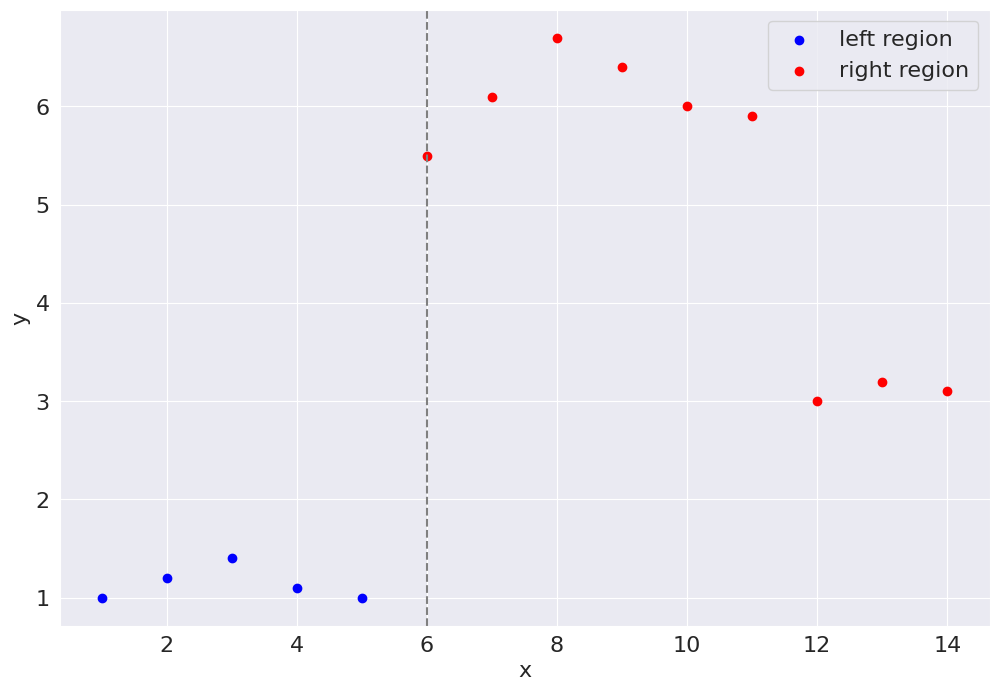

In [131]:
threshold = best_threshold

data_left = data[data["x"] < threshold]
data_right = data[data["x"] >= threshold]


param_data = {
    'scatter': [
        {'x': data_left['x'], 'y': data_left['y'], 'c': 'b', 'label': 'left region'},
        {'x': data_right['x'], 'y': data_right['y'], 'c': 'r', 'label': 'right region'},
    ],
    'axvline': [
        {'x': best_threshold, 'c': 'gray', 'linestyle': '--'}
    ]
}

draw_distribution(param_data)